## **TMDB Movie Data Analysis using Pandas and APIs**


In [2]:
import os
import time
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import matplotlib.pyplot as plt

### 1. **Fetching the movie data from the API**

In [3]:
load_dotenv()

TMDB_API_KEY = os.getenv("TMDB_API_KEY")

print(f"The TMDB API Key is fetched")

The TMDB API Key is fetched


In [4]:
# TMDB base URLs and Endpoints
BASE_URL = "https://api.themoviedb.org/3"
MOVIE_ENDPOINT = f"{BASE_URL}/movie"
CREDITS_ENDPOINT = f"{BASE_URL}/movie"

# Movie IDs to fetch
movie_ids = [
    0, 299534, 19995, 140607, 299536, 597, 135397, 420818,
    24428, 168259, 99861, 284054, 12445, 181808, 330457,
    351286, 109445, 321612, 260513
]

len(movie_ids), movie_ids[:5]


(19, [0, 299534, 19995, 140607, 299536])

In [5]:
def get_tmdb_json(url, params=None, verbose=True):
    """Get JSON from the API. Returns None if it fails."""
    
    if params is None:
        params = {}
    params["api_key"] = TMDB_API_KEY
    
    try:
        r = requests.get(url, params=params)
        r.raise_for_status()
        return r.json()
    except Exception as e:
        if verbose:
            print(f"Failed to get data from {url}")
        return None


In [6]:
def fetch_movie_with_credits(movie_id, sleep_time=0.2):
    """Get movie info and credits for an ID."""
    
    # Get movie details
    details_url = f"{MOVIE_ENDPOINT}/{movie_id}"
    details = get_tmdb_json(details_url)
    
    if not details:
        print(f"ID {movie_id}: Movie not found")
        return None
    
    # Get credits
    credits_url = f"{CREDITS_ENDPOINT}/{movie_id}/credits"
    credits = get_tmdb_json(credits_url)
    
    if not credits:
        credits = {"cast": [], "crew": []}
    
    # Build the record
    record = {}
    fields = [
        "id", "title", "tagline", "release_date", "genres",
        "belongs_to_collection", "original_language", "budget",
        "revenue", "production_companies", "production_countries",
        "vote_count", "vote_average", "popularity", "runtime",
        "overview", "spoken_languages", "poster_path", "status",
        "adult", "imdb_id", "original_title", "video", "homepage"
    ]
    
    for field in fields:
        record[field] = details.get(field)
    
    # Add credits
    record["cast"] = credits.get("cast", [])
    record["crew"] = credits.get("crew", [])
    
    # Wait a bit before next call
    time.sleep(sleep_time)
    
    return record

In [7]:
records = []

for m_id in movie_ids:
    print(f"Fetching movie_id = {m_id}")
    rec = fetch_movie_with_credits(m_id)
    if rec is not None:
        records.append(rec)

df_raw = pd.DataFrame(records)

df_raw.shape, df_raw.columns


Fetching movie_id = 0
Failed to get data from https://api.themoviedb.org/3/movie/0
ID 0: Movie not found
Fetching movie_id = 299534
Fetching movie_id = 19995
Fetching movie_id = 140607
Fetching movie_id = 299536
Fetching movie_id = 597
Fetching movie_id = 135397
Fetching movie_id = 420818
Fetching movie_id = 24428
Fetching movie_id = 168259
Fetching movie_id = 99861
Fetching movie_id = 284054
Fetching movie_id = 12445
Fetching movie_id = 181808
Fetching movie_id = 330457
Fetching movie_id = 351286
Fetching movie_id = 109445
Fetching movie_id = 321612
Fetching movie_id = 260513


((18, 26),
 Index(['id', 'title', 'tagline', 'release_date', 'genres',
        'belongs_to_collection', 'original_language', 'budget', 'revenue',
        'production_companies', 'production_countries', 'vote_count',
        'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages',
        'poster_path', 'status', 'adult', 'imdb_id', 'original_title', 'video',
        'homepage', 'cast', 'crew'],
       dtype='object'))

In [8]:
df_raw.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget,revenue,production_companies,...,spoken_languages,poster_path,status,adult,imdb_id,original_title,video,homepage,cast,crew
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...","{'id': 86311, 'name': 'The Avengers Collection...",en,356000000,2799439100,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,Released,False,tt4154796,Avengers: Endgame,False,https://www.marvel.com/movies/avengers-endgame,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 0, 'id': 3019687, ..."
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","{'id': 87096, 'name': 'Avatar Collection', 'po...",en,237000000,2923706026,"[{'id': 444, 'logo_path': None, 'name': 'Dune ...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Released,False,tt0499549,Avatar,False,https://www.avatar.com/movies/avatar,"[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 58871, 'k..."
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 10, 'name': 'Star Wars Collection', 'po...",en,245000000,2068223624,"[{'id': 1, 'logo_path': '/tlVSws0RvvtPBwViUyOF...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Released,False,tt2488496,Star Wars: The Force Awakens,False,http://www.starwars.com/films/star-wars-episod...,"[{'adult': False, 'gender': 2, 'id': 3, 'known...","[{'adult': False, 'gender': 2, 'id': 491, 'kno..."
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 86311, 'name': 'The Avengers Collection...",en,300000000,2052415039,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Released,False,tt4154756,Avengers: Infinity War,False,https://www.marvel.com/movies/avengers-infinit...,"[{'adult': False, 'gender': 2, 'id': 3223, 'kn...","[{'adult': False, 'gender': 0, 'id': 3019687, ..."
4,597,Titanic,Nothing on earth could come between them.,1997-11-18,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",None,en,200000000,2264162353,"[{'id': 4, 'logo_path': '/jay6WcMgagAklUt7i9Eu...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Released,False,tt0120338,Titanic,False,https://www.paramountmovies.com/movies/titanic,"[{'adult': False, 'gender': 2, 'id': 6193, 'kn...","[{'adult': False, 'gender': 2, 'id': 2710, 'kn..."


In [9]:
df_raw.dtypes

id                         int64
title                     object
tagline                   object
release_date              object
genres                    object
belongs_to_collection     object
original_language         object
budget                     int64
revenue                    int64
production_companies      object
production_countries      object
vote_count                 int64
vote_average             float64
popularity               float64
runtime                    int64
overview                  object
spoken_languages          object
poster_path               object
status                    object
adult                       bool
imdb_id                   object
original_title            object
video                       bool
homepage                  object
cast                      object
crew                      object
dtype: object

### 2. **DATA CLEANING AND PREPROCESSING**
---
#### **Data Preparation and Cleaning**

In [10]:
# Dropping unnecessary columns
movie_df = df_raw.copy()
cols_to_drop = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
movie_df = movie_df.drop(columns=[c for c in cols_to_drop if c in movie_df.columns])

movie_df.columns


Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget', 'revenue',
       'production_companies', 'production_countries', 'vote_count',
       'vote_average', 'popularity', 'runtime', 'overview', 'spoken_languages',
       'poster_path', 'status', 'cast', 'crew'],
      dtype='object')

In [11]:
def extract_collection_name(x):
    """Extract collection name from belongs_to_collection"""
    if isinstance(x, dict) and 'name' in x:
        return x.get('name')
    return np.nan

movie_df["belongs_to_collection"] = movie_df["belongs_to_collection"].apply(extract_collection_name)
movie_df["belongs_to_collection"].value_counts(dropna=False)

belongs_to_collection
The Avengers Collection                4
Star Wars Collection                   2
NaN                                    2
Jurassic Park Collection               2
Frozen Collection                      2
Avatar Collection                      1
The Lion King (Reboot) Collection      1
The Fast and the Furious Collection    1
Black Panther Collection               1
Harry Potter Collection                1
The Incredibles Collection             1
Name: count, dtype: int64

In [12]:
def extract_names_from_list(lst, key='name'):
        """Extract names from list of dictionaries and joins them into a string separated with | for clarity"""
        if isinstance(lst, list) and len(lst) > 0:
            names = [d.get(key, '') for d in lst if isinstance(d, dict)]
            return '|'.join(filter(None, names))
        return np.nan

json_cols = [
    "genres",
    "spoken_languages",
    "production_countries",
    "production_companies",
]


In [13]:

for col in json_cols:
    if col in movie_df.columns:
        movie_df[col] = movie_df[col].apply(extract_names_from_list)

movie_df[["genres", "spoken_languages", "production_countries", "production_companies"]].value_counts(dropna=False)


genres                                     spoken_languages                                   production_countries                     production_companies                                                                
Action|Adventure|Animation|Family          English                                            United States of America                 Pixar                                                                                   1
Action|Adventure|Fantasy|Science Fiction   English|Español                                    United States of America|United Kingdom  Dune Entertainment|Lightstorm Entertainment|20th Century Fox|Ingenious Film Partners    1
Family|Fantasy|Romance                     English|Français                                   United States of America                 Walt Disney Pictures|Mandeville Films                                                   1
Family|Animation|Adventure|Comedy|Fantasy  English                                            United Stat

#### **Cast and Directors Information**

In [14]:
def get_cast_info(cast_list):
    """Count number of cast members, and show all of their names"""
    if isinstance(cast_list, list):
        names = [person.get('name') for person in cast_list
                 if isinstance(person, dict) and person.get('name')]
        cast_size = len(names)
        if cast_size == 0:
            return np.nan, 0
        cast_str = "|".join(names)
        return cast_str, cast_size
    return np.nan, 0

def get_director(crew_list):
    """Extract director name from crew"""
    if isinstance(crew_list, list):
        for person in crew_list:
            if isinstance(person, dict) and person.get('job') == 'Director':
                return person.get('name')
    return np.nan

def get_crew_size(crew_list):
    """Count number of crew members"""
    if isinstance(crew_list, list):
        return len(crew_list)
    return 0

In [15]:
# Cast
cast_info = movie_df["cast"].apply(lambda x: pd.Series(get_cast_info(x)))
movie_df["cast"] = cast_info[0]       
movie_df["cast_size"] = cast_info[1]

#Crew
movie_df["director"] = movie_df["crew"].apply(get_director)
movie_df["crew_size"] = movie_df["crew"].apply(get_crew_size)

# Now we can drop the original column
movie_df = movie_df.drop(columns=["crew"])
movie_df[["title", "cast", "cast_size", "director", "crew_size"]].head()


,title,cast,cast_size,director,crew_size
0,Avengers: Endgame,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,106,Anthony Russo,607
1,Avatar,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,67,James Cameron,990
2,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,262
3,Avengers: Infinity War,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo,733
4,Titanic,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,262


#### **Converting data types to more conventional ones**

In [16]:
# Numeric columns
numeric_cols = ["budget", "revenue", "id", "popularity", "vote_count", "vote_average", "runtime"]

for col in numeric_cols:
    if col in movie_df.columns:
        movie_df[col] = pd.to_numeric(movie_df[col], errors="coerce")

# Release_date to datetime
if "release_date" in movie_df.columns:
    movie_df["release_date"] = pd.to_datetime(movie_df["release_date"], errors="coerce")

movie_df.dtypes

id                                int64
title                            object
tagline                          object
release_date             datetime64[ns]
genres                           object
belongs_to_collection            object
original_language                object
budget                            int64
revenue                           int64
production_companies             object
production_countries             object
vote_count                        int64
vote_average                    float64
popularity                      float64
runtime                           int64
overview                         object
spoken_languages                 object
poster_path                      object
status                           object
cast                             object
cast_size                         int64
director                         object
crew_size                         int64
dtype: object

#### **Replacing Unrealistic Values**

Handling 0 values and converting to millions. Chose to convert the these to `NaN` or missing in regard of keeping authenticity and not adding things we are not sure of.

In [17]:
for col in ["budget", "revenue", "runtime"]:
    if col in movie_df.columns:
        n_zeros = (movie_df[col] == 0).sum()
        print(f"{col}: replacing {n_zeros} zeros with NaN")
        movie_df[col] = movie_df[col].replace(0, np.nan)


# Million conversion
movie_df["budget_musd"] = movie_df["budget"] / 1_000_000
movie_df["revenue_musd"] = movie_df["revenue"] / 1_000_000

movie_df[["title", "budget", "budget_musd", "revenue", "revenue_musd", "runtime"]].head()


budget: replacing 0 zeros with NaN
revenue: replacing 0 zeros with NaN
runtime: replacing 0 zeros with NaN


,title,budget,budget_musd,revenue,revenue_musd,runtime
0,Avengers: Endgame,356000000,356.0,2799439100,2799.439100,181
1,Avatar,237000000,237.0,2923706026,2923.706026,162
2,Star Wars: The Force Awakens,245000000,245.0,2068223624,2068.223624,136
3,Avengers: Infinity War,300000000,300.0,2052415039,2052.415039,149
4,Titanic,200000000,200.0,2264162353,2264.162353,194


Appears that we had nothing to worry about for zero values in these columns! Just cautious


In [18]:
movie_df = movie_df.drop(columns=["budget", "revenue"]) # We don't need these anymore

#### **Cleaning vote_count and other text fields**

In [19]:
mask_zero_votes = (movie_df["vote_count"] == 0)
movie_df.loc[mask_zero_votes, "vote_average"] = np.nan

# Cleaning placeholder text in 'overview' and 'tagline'
placeholders = ["No Data", "No overview found.", "", " ", "N/A", None]

for col in ["overview", "tagline"]:
    if col in movie_df.columns:
        movie_df[col] = movie_df[col].replace(placeholders, np.nan)


#### **Removing Duplicates & Invalid Rows**
Let us remove duplicates in crucial columns like id. Also chose to keep only rows whose missing values don't exceed 10 or those with either no id or title.


In [20]:
# Remove duplicates by movie ID
movie_df = movie_df.drop_duplicates(subset="id")

# Drop rows missing ID or title
movie_df = movie_df.dropna(subset=["id", "title"])
movie_df = movie_df.dropna(thresh=10)
movie_df.shape


(18, 23)

The dataframe appears unchanged which means that we have no duplicates, missing titles or ids, or with more than 10 missing values. That's a good thing.

#### **Keep only “Released” movies and drop status**

After keeping only released  movies, we know their status so no need for that columns anymore!

In [21]:
if "status" in movie_df.columns:
    print("Status counts before filtering:")
    print(movie_df["status"].value_counts(dropna=False))

    movie_df = movie_df[movie_df["status"] == "Released"].copy()
    movie_df = movie_df.drop(columns=["status"], errors="ignore")

Status counts before filtering:
status
Released    18
Name: count, dtype: int64


Turns out no unreleased movies anyway! So our data is still intact.

#### **Reorder Columns and Reset Index**
Now we can follow the order given

In [22]:
final_columns = [
    'id', 'title', 'tagline', 'release_date', 'genres','belongs_to_collection', 
    'original_language', 'budget_musd', 'revenue_musd','production_companies', 
    'production_countries','vote_count', 'vote_average', 'popularity', 'runtime',
    'overview', 'spoken_languages', 'poster_path','cast', 'cast_size', 'director', 'crew_size'
]
movie_df = movie_df[final_columns].reset_index(drop = True)
movie_df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,8.237,14.1354,181,After the devastating events of Avengers: Infi...,English|日本語,/bR8ISy1O9XQxqiy0fQFw2BX72RQ.jpg,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,106,Anthony Russo,607
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,7.594,38.3620,162,"In the 22nd century, a paraplegic Marine is di...",English|Español,/gKY6q7SjCkAU6FqvqWybDYgUKIF.jpg,Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,67,James Cameron,990
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,...,7.300,8.0829,136,Thirty years after defeating the Galactic Empi...,English,/wqnLdwVXoBjKibFRR5U3y0aDUhs.jpg,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,183,J.J. Abrams,262
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,8.235,21.3823,149,As the Avengers and their allies have continue...,English,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo,733
4,597,Titanic,Nothing on earth could come between them.,1997-11-18,Drama|Romance,NaN,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,...,7.903,26.5070,194,101-year-old Rose DeWitt Bukater tells the sto...,English|Français|Deutsch|svenska|Italiano|Pусский,/9xjZS2rlVxm8SFx8kPC3aIGCOYQ.jpg,Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,262


We run into no errors so, all the columns did exist and now we have them in the order we want. We can proceed to KPI calculations and Analysis.



### 3. **KPI IMPLEMENTATION & MOVIE PERFORMANCE ANALYSIS**
Now that our data is ready, in this section, we compute key performance indicators (KPIs) related to movie financial performance, popularity, and audience reception. These are to allow us to identify the best and worst performing movies across multiple dimensions and rank them.

#### **Profit & Return on Investment (ROI)**

In [23]:
# Profit
movie_df["profit_musd"] = movie_df["revenue_musd"] - movie_df["budget_musd"]

# ROI (for movies with budget >= 10M)
movie_df["roi"] = movie_df.apply(
    lambda row: row["revenue_musd"] / row["budget_musd"] if row["budget_musd"] >= 10 else np.nan,
    axis=1
)
movie_df[["title", "budget_musd", "revenue_musd", "profit_musd", "roi"]].head()


,title,budget_musd,revenue_musd,profit_musd,roi
0,Avengers: Endgame,356.0,2799.439100,2443.439100,7.863593
1,Avatar,237.0,2923.706026,2686.706026,12.336312
2,Star Wars: The Force Awakens,245.0,2068.223624,1823.223624,8.441729
3,Avengers: Infinity War,300.0,2052.415039,1752.415039,6.841383
4,Titanic,200.0,2264.162353,2064.162353,11.320812


In [24]:
movie_df['roi'].isna().sum()

0

Al the movies in the dataset exceed 10 Million USD in Budget!

#### **Best and worst Movies**
Let us first create a function to help us rank the movies accordingly

In [25]:
def rank_movies(df, column, ascending=False):
    """
    Rank movies based on a chosen column.
    
    
    """
    return (
        df[df[column].notna()]
        .sort_values(by=column, ascending=ascending)[["id", "title", column]]
    )

- w.r.t Revenue

In [26]:
revenue_rank = rank_movies(movie_df, "revenue_musd")
print(f"The highest revenue generating movie is: {revenue_rank.iloc[0]['title']} it generated ${revenue_rank.iloc[0]['revenue_musd']:.2f}M in revenue.")
print(f"The lowest revenue generating movie is: {revenue_rank.iloc[-1]['title']} it generated ${revenue_rank.iloc[-1]['revenue_musd']:.2f}M in revenue.")


The highest revenue generating movie is: Avatar it generated $2923.71M in revenue.
The lowest revenue generating movie is: Incredibles 2 it generated $1243.23M in revenue.


- w.r.t Profit

In [27]:
profit_rank = rank_movies(movie_df, "profit_musd")
print(f"The highest profit generating movie is: {profit_rank.iloc[0]['title']} it generated ${profit_rank.iloc[0]['profit_musd']:.2f}M in profit.")
print(f"The lowest profit generating movie is: {profit_rank.iloc[-1]['title']} it generated ${profit_rank.iloc[-1]['profit_musd']:.2f}M in profit.")


The highest profit generating movie is: Avatar it generated $2686.71M in profit.
The lowest profit generating movie is: Star Wars: The Last Jedi it generated $1032.70M in profit.


- w.r.t ROI

In [28]:
roi_rank = rank_movies(movie_df, "roi")
print(f"The highest roi generating movie is: {roi_rank.iloc[0]['title']} with {roi_rank.iloc[0]['roi']:.2f} ROI.")
print(f"The lowest roi generating movie is: {roi_rank.iloc[-1]['title']} with {roi_rank.iloc[-1]['roi']:.2f} ROI.")



The highest roi generating movie is: Avatar with 12.34 ROI.
The lowest roi generating movie is: Star Wars: The Last Jedi with 4.44 ROI.


- w.r.t Votes

Let us see The top movies with the highest number of votes. these represent titles that received the most audience engagement on TMDB.

In [29]:
print("Top 3 most voted movies by vote count:")
rank_movies(movie_df, "vote_count").head(3)


Top 3 most voted movies by vote count:


,id,title,vote_count
7,24428,The Avengers,34359
1,19995,Avatar,32893
3,299536,Avengers: Infinity War,31193


In [30]:
print("Top 3 high rated movies according to the average vote:")
rank_movies(movie_df[movie_df["vote_count"] >= 10], "vote_average").head(3)


Top 3 high rated movies according to the average vote:


,id,title,vote_average
0,299534,Avengers: Endgame,8.237
3,299536,Avengers: Infinity War,8.235
11,12445,Harry Potter and the Deathly Hallows: Part 2,8.083


In [31]:
print("Least rated movies according to the average vote:")
rank_movies(movie_df[movie_df["vote_count"] >= 10], "vote_average").tail(3)


Least rated movies according to the average vote:


,id,title,vote_average
12,181808,Star Wars: The Last Jedi,6.800
5,135397,Jurassic World,6.700
14,351286,Jurassic World: Fallen Kingdom,6.537


#### **Advanced Filtering and Search Queries**

#### 1 — Best-Rated Science Fiction Action Movies Starring Bruce Willis

1. The cast list includes **Bruce Willis**
2. The movie genres include **Science Fiction** and **Action**
3. The movie has at least **10 votes** to ensure rating reliability

In [32]:
query1 = movie_df[
    movie_df["cast"].str.contains("Bruce Willis") &
    movie_df["genres"].str.contains("Science Fiction") &
    movie_df["genres"].str.contains("Action") &
    (movie_df["vote_count"] >= 10)
].sort_values(by="vote_average", ascending=False)

query1[["title", "genres", "cast", "vote_count", "vote_average"]]


,title,genres,cast,vote_count,vote_average


This appears empty. Let us see if we atleast have any movie with BruceWillis as one of the actors

In [33]:
bruce_df = movie_df[
    movie_df["cast"].str.contains("Bruce Willis") 
].sort_values(by="vote_average", ascending=False)

bruce_df[["title", "genres", "cast", "vote_count", "vote_average"]]

,title,genres,cast,vote_count,vote_average


This confirmas that there is no such actor as Bruce Willis in our dataset so we can't really feetch this first query!

#### 2 — Uma Thurman Movies Directed by Quentin Tarantino


In [34]:
query2 = movie_df[
    movie_df["cast"].str.contains("Uma Thurman") &
    movie_df["director"].str.contains("Quentin Tarantino")
].sort_values(by="runtime", ascending=True)

query2[["title", "cast", "director", "runtime"]]


,title,cast,director,runtime


Similarly, there are no sunch movies in our data

#### **Franchise vs Standalone Movie Performance**
- **Franchise movies**: movies that belong to a collection
- **Standalone movies**: movies that do not belong to any collection

To compare these two we use the `belongs_to_collection` column:
- If it is non-null → the movie is part of a **franchise**
- If it is null → the movie is **standalone**

Let us first create a flag column to categorize all the movies

In [35]:
# boolean flag
movie_df["is_franchise"] = movie_df["belongs_to_collection"].notna()

movie_df[["title", "belongs_to_collection", "is_franchise"]].head()


,title,belongs_to_collection,is_franchise
0,Avengers: Endgame,The Avengers Collection,True
1,Avatar,Avatar Collection,True
2,Star Wars: The Force Awakens,Star Wars Collection,True
3,Avengers: Infinity War,The Avengers Collection,True
4,Titanic,NaN,False


Now for the comparison, The considered aggregations are:
- Mean Revenue
- Median ROI
- Mean Budget Raised
- Mean Popularity
- Mean Rating 

In [36]:
franchise_summary = (
    movie_df
    .groupby("is_franchise")
    .agg(
        mean_revenue_musd = ("revenue_musd", "mean"),
        median_roi         = ("roi", "median"),
        mean_budget_musd   = ("budget_musd", "mean"),
        mean_popularity    = ("popularity", "mean"),
        mean_rating        = ("vote_average", "mean")
    )
)

franchise_summary


,mean_revenue_musd,median_roi,mean_budget_musd,mean_popularity,mean_rating
is_franchise,,,,,
False,1765.139159,9.617018,180.0,19.405000,7.436000
True,1682.668411,7.786117,218.0,16.255437,7.396312


From this small aggregation table, standalone movies appear to outperform franchise titles on several key metrics:

- Standalone movies earn slightly more on average despite having lower budgets.

- They also show a higher median ROI, meaning better financial efficiency.

- Franchise movies cost more to produce but do not outperform in revenue or ROI.

- Standalone titles have higher popularity, while ratings are nearly the same for both groups.

#### **Most Successful Movie Franchises**

Now that we know whic category is performing better in general, let us dive into the Franchise movies and see how each collection is doing.

In [37]:
franchise_df = movie_df[movie_df["belongs_to_collection"].notna()].copy()

franchise_metrics = (
    franchise_df
    .groupby("belongs_to_collection")
    .agg(
        n_movies          = ("id", "count"),
        total_budget_musd = ("budget_musd", "sum"),
        mean_budget_musd  = ("budget_musd", "mean"),
        total_revenue_musd= ("revenue_musd", "sum"),
        mean_revenue_musd = ("revenue_musd", "mean"),
        mean_rating       = ("vote_average", "mean"),
        mean_roi          = ("roi", "mean")
    )
    .sort_values(by="total_revenue_musd", ascending=False)
)

franchise_metrics.head(10)


,n_movies,total_budget_musd,mean_budget_musd,total_revenue_musd,mean_revenue_musd,mean_rating,mean_roi
belongs_to_collection,,,,,,,
The Avengers Collection,4,1111.0,277.75,7776.073348,1944.018337,7.9035,6.897281
Star Wars Collection,2,545.0,272.50,3400.922454,1700.461227,7.0500,6.442029
Jurassic Park Collection,2,320.0,160.00,2982.006481,1491.003241,6.6185,9.426112
Avatar Collection,1,237.0,237.00,2923.706026,2923.706026,7.5940,12.336312
Frozen Collection,2,300.0,150.00,2727.902485,1363.951242,7.2445,9.093008
The Lion King (Reboot) Collection,1,260.0,260.00,1662.020819,1662.020819,7.1020,6.392388
The Fast and the Furious Collection,1,190.0,190.00,1515.400000,1515.400000,7.2220,7.975789
Black Panther Collection,1,200.0,200.00,1349.926083,1349.926083,7.4000,6.749630
Harry Potter Collection,1,125.0,125.00,1341.511219,1341.511219,8.0830,10.732090


#### **Most Successful Directors**
Finally, let us analyze directors by aggregating their movies and computing:

- Total number of movies directed in our sample
- Total box-office revenue (million USD)
- Mean rating across their movies
- Mean ROI

We will exclude rows with missing director information.

In [38]:
movie_df["director"].isna().sum()

0

Since we don't have any movies with no director in our data we can continue. There is no row to exclude in our analysis

In [39]:
director_metrics = (
    movie_df
    .groupby("director")
    .agg(
        n_movies          = ("id", "count"),
        total_revenue_musd= ("revenue_musd", "sum"),
        mean_rating       = ("vote_average", "mean"),
        mean_roi          = ("roi", "mean")
    )
)

director_metrics = director_metrics.sort_values(by="total_revenue_musd", ascending=False)

director_metrics.head(10)


,n_movies,total_revenue_musd,mean_rating,mean_roi
director,,,,
James Cameron,2,5187.868379,7.7485,11.828562
Joss Whedon,2,2924.219209,7.5710,6.442074
Anthony Russo,1,2799.439100,8.2370,7.863593
J.J. Abrams,1,2068.223624,7.3000,8.441729
Joe Russo,1,2052.415039,8.2350,6.841383
Colin Trevorrow,1,1671.537444,6.7000,11.143583
Jon Favreau,1,1662.020819,7.1020,6.392388
James Wan,1,1515.400000,7.2220,7.975789
Jennifer Lee,1,1453.683476,7.2400,9.691223


These results indicate that directors associated with large-scale films dominate total box-office revenue. **James Cameron** and **Anthony Russo** lead in cumulative revenue, reflecting the strong commercial impact of high-budget, globally distributed productions.It is also worth noting that they have both directed 2 movies each in this dataset.

However, high revenue (that could just easily be coming from the number of directed movies) does not always coincide with the highest efficiency: **Colin Trevorrow** and **David Yates** exhibit notably high mean ROI, suggesting particularly effective budget utilization even in their one movie.  

Mean ratings remain relatively stable across directors (≈7–8), indicating that financial success in this sample is more strongly driven by scale and franchise reach than by differences in audience ratings alone.


### **4 Data Visualization**
Now let us visually compare some metrices for clear and better understanding of different movie performance

#### **Revenue Vs budget**

We want to know how the revenue generated from each movie compares to its budget. We will use a reference line of the budget in our data multiplied by 5.

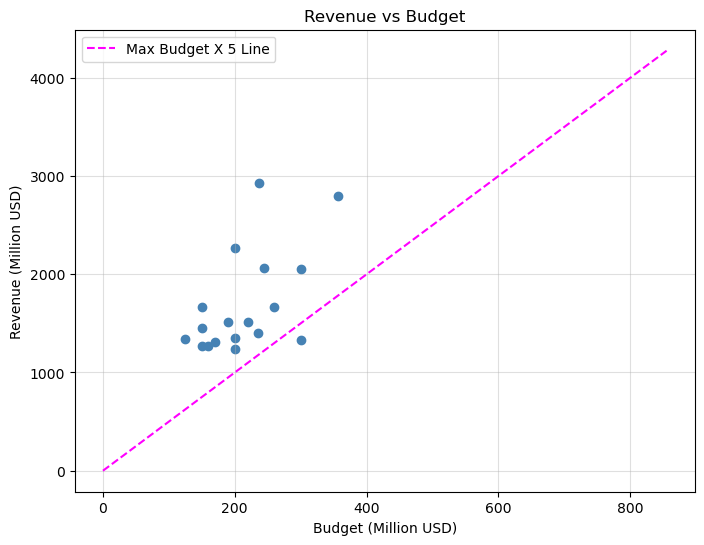

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(movie_df["budget_musd"], movie_df["revenue_musd"], c="steelblue")

# Reference line
max_budget = movie_df["budget_musd"].max()
roi_x = range(0, int(max_budget)+500)
roi_y = [x * 5 for x in roi_x]
plt.plot(roi_x, roi_y, "--", color="magenta", label="Max Budget X 5 Line")

plt.xlabel("Budget (Million USD)")
plt.ylabel("Revenue (Million USD)")
plt.title("Revenue vs Budget")
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [44]:
under_5x = movie_df[movie_df["revenue_musd"] < 5 * movie_df["budget_musd"]]

under_5x[["title", "budget_musd", "revenue_musd", "profit_musd", "roi"]]

,title,budget_musd,revenue_musd,profit_musd,roi
12,Star Wars: The Last Jedi,300.0,1332.69883,1032.69883,4.442329


Movies above the red line achieved exceptionally high ROI. Most titles fall on a positive trend. This means that movies with higher budgets generally earn more revenue, but only a few come close to achieving very high returns relative to what they cost. This shows that while larger productions tend to make more money overall, they are not always the most financially efficient.

There was only one movie (**Star Wars: The Last Jedi**) whose revenue failed to exceed 5 times its budget and it is among the ones with the highest budgets in our data.

#### **ROI Distribution by Genre**

Now for the genre analysis. Let us lookat the mean Return on Ivestment by genre.

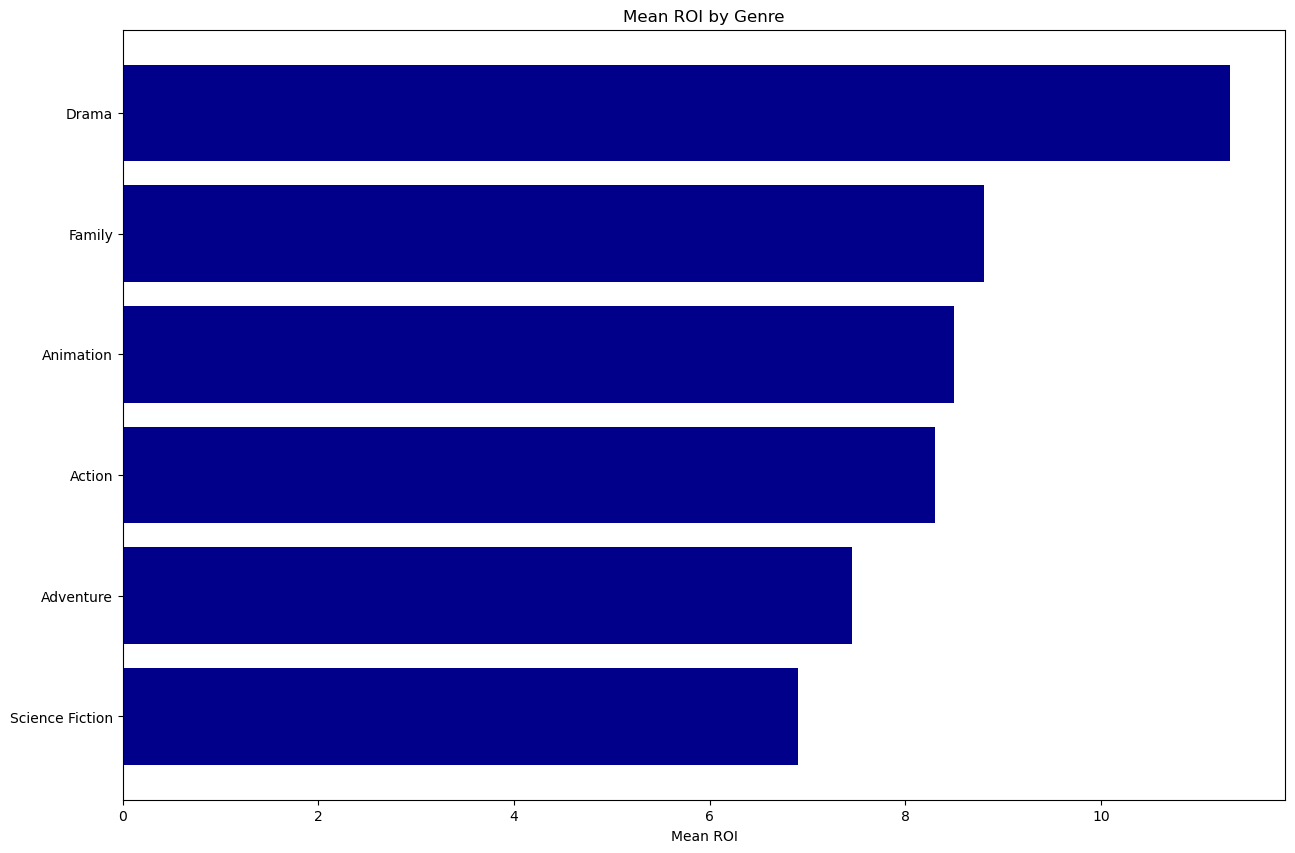

In [55]:
# compute mean ROI per primary genre
roi_mean = (
    movie_df.dropna(subset=["roi"])
            .assign(primary_genre=lambda df: df["genres"].str.split("|").str[0])
            .groupby("primary_genre")["roi"]
            .mean()
            .sort_values()
)

plt.figure(figsize=(15,10))
plt.barh(roi_mean.index, roi_mean.values, color="darkblue")
plt.xlabel("Mean ROI")
plt.title("Mean ROI by Genre")
plt.show()

Drama and Family movies tend to give the best return for the money spent, while genres like Animation and Action still perform well but with slightly lower efficiency. Adventure and Science Fiction show the smallest returns compared to their production costs. Overall, some of the less effects-heavy genres appear to stretch their budgets a bit further.

#### **Popularity vs. Rating**

One would want to check if the movies' rating really depends on their popilarity. So that is what we are going to do now.

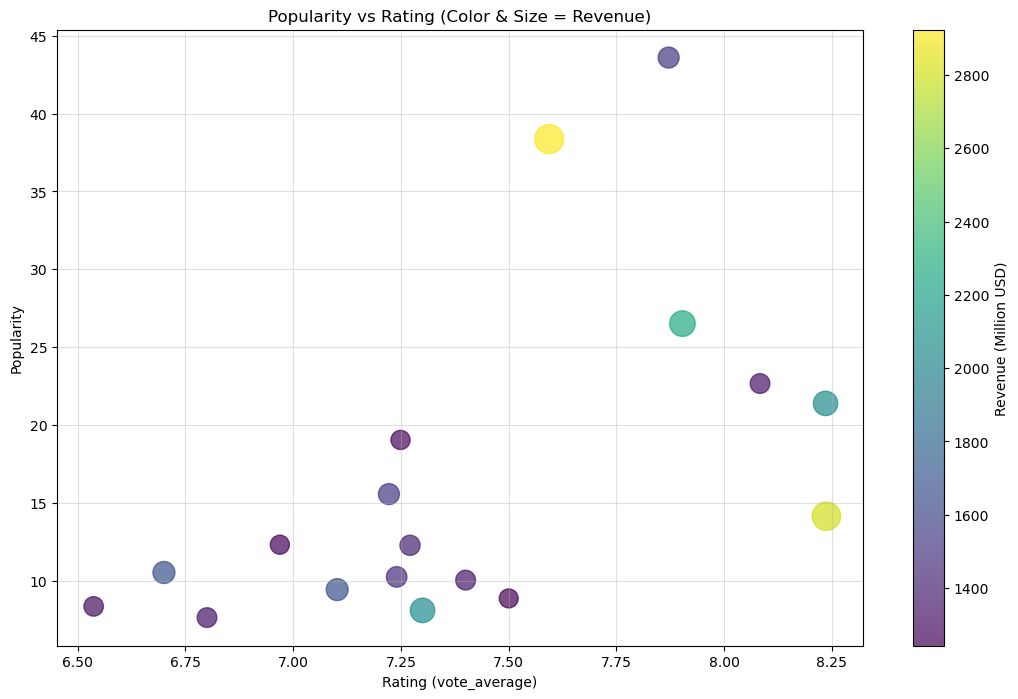

In [60]:
plt.figure(figsize=(13,8))

sizes = movie_df["revenue_musd"] * 0.15
colors = movie_df["revenue_musd"]    

scatter = plt.scatter(
    movie_df["vote_average"],
    movie_df["popularity"],
    s=sizes,
    c=colors,
    alpha=0.7,
    cmap="viridis"     
)

plt.xlabel("Rating (vote_average)")
plt.ylabel("Popularity")
plt.title("Popularity vs Rating (Color & Size = Revenue)")
plt.grid(alpha=0.4)

cbar = plt.colorbar(scatter)
cbar.set_label("Revenue (Million USD)")

plt.show()


Movies with higher ratings don’t always have the highest popularity, but the ones that are both well-rated and widely talked about stand out clearly. The larger bubbles show that the biggest earners tend to sit in this upper area, meaning revenue often follows a mix of strong audience interest withmost especially good ratings.

#### **Trends in Box Office Performance**

Does Revenue generated by a movie really depend on its release date? We are going to see the annual released movies trend of revenue generated.

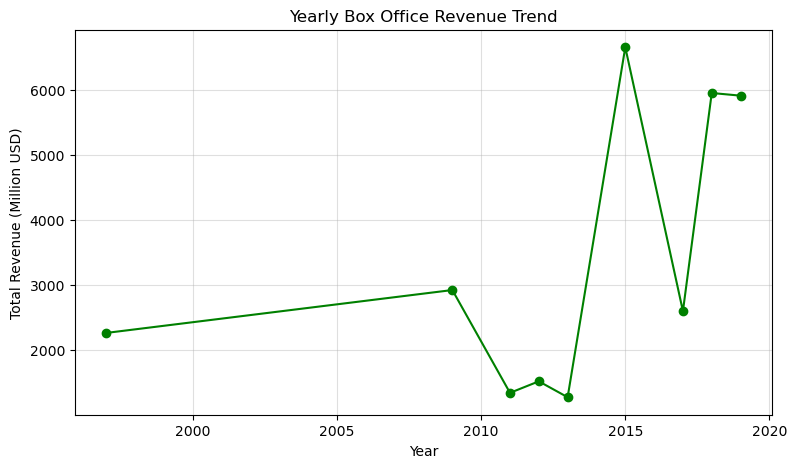

In [62]:
movie_df["year"] = movie_df["release_date"].dt.year

yearly = movie_df.groupby("year")["revenue_musd"].sum()

plt.figure(figsize=(9,5))
plt.plot(yearly.index, yearly.values, "-o", color="green")
plt.xlabel("Year")
plt.ylabel("Total Revenue (Million USD)")
plt.title("Yearly Box Office Revenue Trend")
plt.grid(alpha=0.4)
plt.show()


Total revenue changes a lot from year to year in this dataset. There’s a clear dip around 2010–2012, followed by a sharp jump in the mid-2010s when some very high-earning movies were released. The last few years stay relatively high, suggesting stronger titles in the later period of the dataset.

#### **Franchise vs. Standalone Success**

We saw earlier the comparison of movies that don't belong to any particular collection and those that do. The stand-alone movies performed relatively better. Let us visualize this for a more clear view and understanding.

<Figure size 700x600 with 0 Axes>

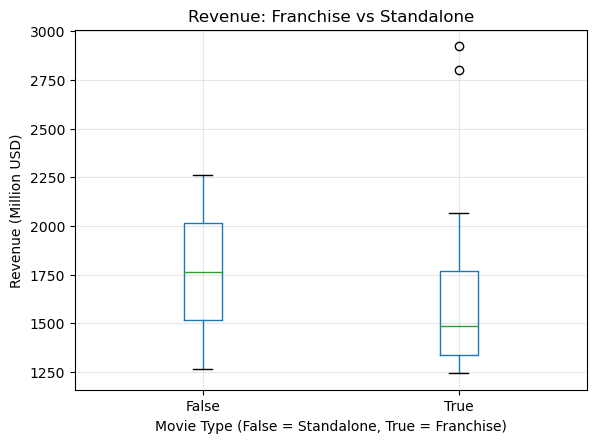

In [64]:
plt.figure(figsize=(7,6))
movie_df.boxplot(column="revenue_musd", by="is_franchise")
plt.title("Revenue: Franchise vs Standalone")
plt.suptitle("")
plt.xlabel("Movie Type (False = Standalone, True = Franchise)")
plt.ylabel("Revenue (Million USD)")
plt.grid(alpha=0.3)
plt.show()


Both standalone and franchise movies show a wide mix of revenues, but their typical values are fairly close. Standalone films sit a little higher in the middle range, while a few franchise titles rise far above the rest. This suggests that standalone typically does better, with franchises occasionally producing very big hits.

#### **Top Movies**

Let us also visualiza the most profitable movies for a clear comparison. This will give value to what we saw earlier. These are the top 10 movies:

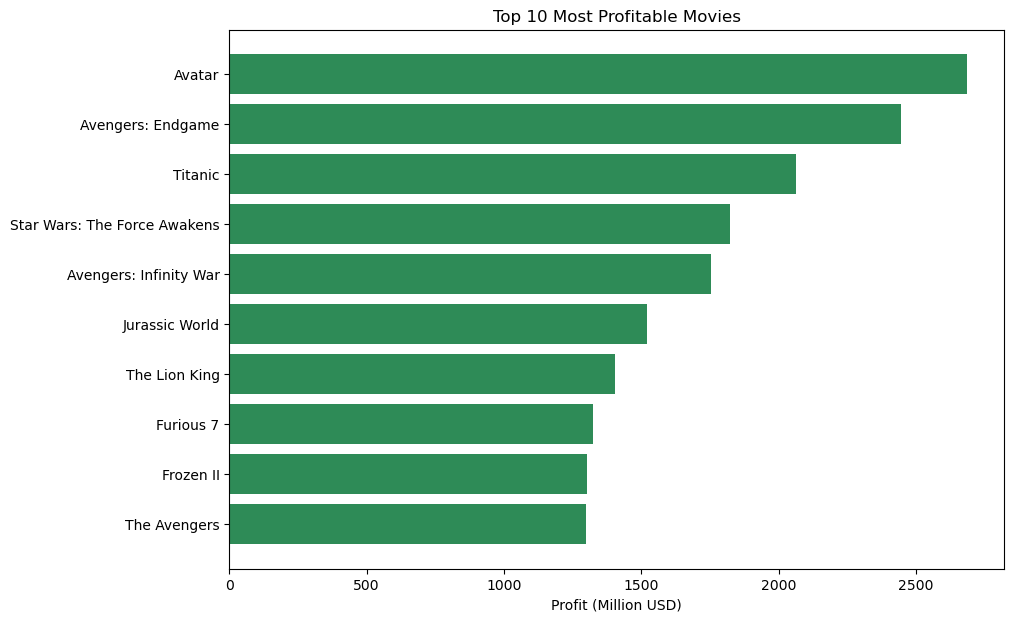

In [69]:
top_profit = movie_df.sort_values("profit_musd", ascending=False).head(10)

plt.figure(figsize=(10,7))
plt.barh(top_profit["title"], top_profit["profit_musd"], color="seagreen")
plt.xlabel("Profit (Million USD)")
plt.title("Top 10 Most Profitable Movies")
plt.gca().invert_yaxis()
plt.show()


Like we saw earlier, Avatar is the first. It is followed somewhat closely by Avengers: Endgame.

#### **Top Directors**
Now for the directors. A top 10 directors visual to add to the aggregation table

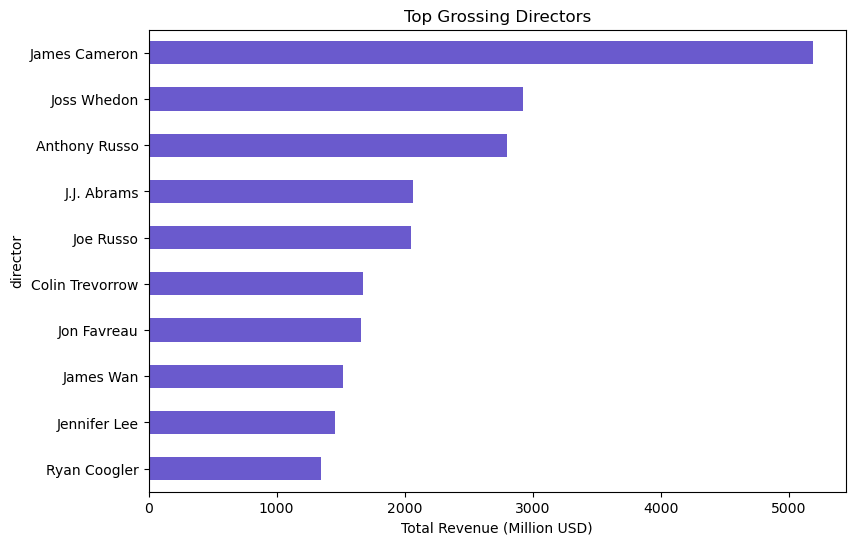

In [70]:
director_df = movie_df.groupby("director")["revenue_musd"].sum().sort_values(ascending=False)

plt.figure(figsize=(9,6))
director_df.head(10).plot(kind="barh", color="slateblue")
plt.xlabel("Total Revenue (Million USD)")
plt.title("Top Grossing Directors")
plt.gca().invert_yaxis()
plt.show()


This doesn't clearly capture the story we got from the table. We know that the first two Directors have 2 entries each in our data. This means that even though they have the most grossing revenue, it could be because we are adding up the revenue across thrir movies. So let us see the mean now.

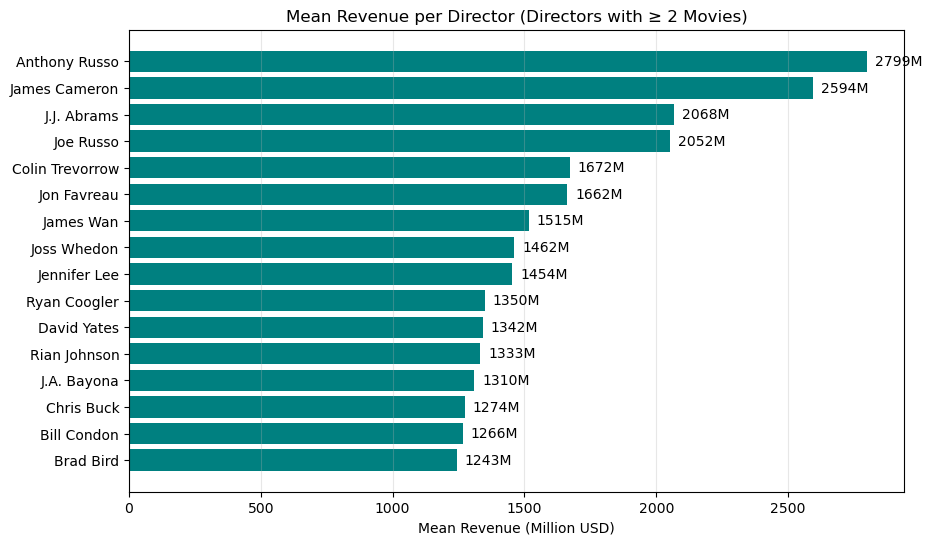

In [ ]:
# Compute number of movies per director
director_counts = movie_df["director"].value_counts()

# Keep only directors with 2 or more movies
multi_directors = director_counts.index

# Compute mean revenue for these directors
director_mean_rev = (
    movie_df[movie_df["director"].isin(multi_directors)]
    .groupby("director")["revenue_musd"]
    .mean()
    .sort_values()
)

# Plot
plt.figure(figsize=(10,6))
bars = plt.barh(director_mean_rev.index, director_mean_rev.values, color="teal")
plt.xlabel("Mean Revenue (Million USD)")
plt.title("Mean Revenue per Director (Directors with ≥ 2 Movies)")
plt.grid(axis='x', alpha=0.3)

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 30,                    
             bar.get_y() + bar.get_height()/2,
             f"{width:.0f}M",
             va="center")

plt.show()


We see a slight shift now with Anthony Russo who came from the third to the second place as well as some others too. Joss Whedon moved back 6 places from the second to the eighth.